## 4. Static analysis
_Test the model in static analysis by applying a pressure of magnitude p = 1000 N/m² on the back of the plate as shown in ﬁgure 2.
Show the deformed shape (appropriately scaled) and visualize the computed electric potential in the piezoelectric patches._

How applying fix BCs and pressure load can be found in the [simulation_static.xml](simulation_static.xml) file.

The voltages at the patches are the following (query them with "Find Data" tool in ParaView):
- Patch1 : 5.628 V
- Patch2: 12.4395 V
- Patch3 : 2.5043 V

The deformed geometry is shown below (bottom and top of plate):  <br><br>
<img src="images1/mechdispl_up.png" alt="Image 1" style="width:500px; height:350px;" /><img src="images1/mechdispl_down.png" alt="Image 1" style="width:500px; height:350px;" /> <br><br>
Also the potentials on the top the patches (ground is their bottom!): <br>
<img src="images1/static_elecpot.png" alt="Image 1" style="width:500px; height:350px;" />



## 5. Eigenvalue analysis

_Compute the ﬁrst 10 eigenmodes of the PMMA plate with piezoelectric patches for open electrode conﬁguration. Visualize the eigenmodes and provide the corresponding natural frequency_

The computed eigenfrequencies can be found in the file [eigen.info.xml](eigen.info.xml) and they are:

     Frequency in Hz |           Errorbound
----------------------------------------
             101.359 |          2.78408e-09
             145.105 |          1.16825e-09
             223.335 |           9.7656e-10
             253.611 |          1.72425e-10
              296.15 |          3.76079e-10
             329.469 |          2.50672e-10
             366.416 |          3.16655e-10
             467.077 |          6.67623e-10
             469.653 |          1.62797e-08
             486.036 |          2.27193e-09

The corresponding modes are visualized here starting with the first eigenmode in the left-up corner and the coresponding eigenmode indices are growing to the bottom right: <br><br>
<img src="images1/eigenmode1.png" alt="Image 1" style="width:400px; height:250px;" /> <img src="images1/eigenmode2.png" alt="Image 1" style="width:400px; height:250px;" /> <img src="images1/eigenmode3.png" alt="Image 1" style="width:400px; height:250px;" />  <br>
<img src="images1/eigenmode4.png" alt="Image 1" style="width:400px; height:250px;" /> <img src="images1/eigenmode5.png" alt="Image 1" style="width:400px; height:250px;" /> <img src="images1/eigenmode6.png" alt="Image 1" style="width:400px; height:250px;" /> <br>
<img src="images1/eigenmode7.png" alt="Image 1" style="width:400px; height:250px;" /> <img src="images1/eigenmode8.png" alt="Image 1" style="width:400px; height:250px;" /> <img src="images1/eigenmode9.png" alt="Image 1" style="width:400px; height:250px;" /> <br>
<img src="images1/eigenmodes10.png" alt="Image 1" style="width:400px; height:250px;" /> 













_Consider the piezoelectric patches as sensors. Briefly discuss how we can use them to detect the eigenmodes of the structure_ **(1 point)** <br><br>
We can use them as sensor by measuring the voltage that is induced on them because of the displacement due to the piezoelectricity. We can detect the eigenmodes by doing eigenvalue analysis, then Fouriertransforming the measured voltage signal at the patches, and finding the peaks at certain frequencies, that are the eigenfrequencies of the structure.

## 6. Harmonic analysis
_For a harmonic excitation with the pressure __p__, compute the transfer function (up to 500Hz) for the voltage at all 3 patches and the displacement of the central node of the PMMA plate. **(1 point)** <br>
Plot the transfer functions and explain the peaks observed in the plot_  **(1 point)** <br><br>

The Transfer- (or frequency response) function FRF expresses the frequency domain relationship between an input (x) and output (y) of a linear, time-invariant system.
FRF is typically represented by the single capital letter $H$. The input is X and output is Y. H, X and Y are all functions versus frequency as shown in the figure below: <br>
                                    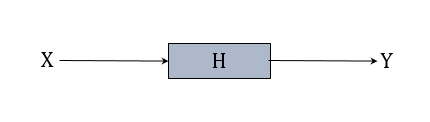<br>
The autopower $S_{xx}$ is the complex conjugate of the input spectrum multiplied by itself , which becomes an all real function, containing no phase. In our case since we applied a pressure, that is a real quantity, we only need to take its square: $S_{xx} = p \cdot p^* = p²$ (* denotes the complex conjugate)

The crosspower $S_{xy}$ is the complex conjugate of the output spectrum multiplied by the input spectrum, and contains both amplitude and phase: $S_{xy} = X \cdot Y^*$. 

$$ \Longrightarrow H = \frac{X \cdot Y^*}{X \cdot X^*} $$


I stored the results of the top the PIC-patches (electrodes), they can be found in hist folder.Unfortunately, results for all nodes are stored, but it suffices to look at only one node per patch surface, since we assume equipotential surface due to having there electrodes whose conductivities we approximate with $\infty$ <br>

**Patch 1** [file here/](history/harmonic1-elecPotential-node-21670-Patch1_SupNodes.hist)
|f (Hz) | ampl (V) | phase (deg) | FRF $H$ [ in V / Pa ] |
|--|:--:| :--:| :--:|
1 | 5.6287834864279436 | 180 | -0.00237251
56.4444 | 7.2204935661991207 | 180 | -0.0026870
111.889  |10.850747582402992  |0 | 0.00329
167.333 | 4.4153520423339891  |180 | -0.00210
222.778 | 566.17987093125873  |180 | -0.02379
278.222 | 5.8027202582064836  |0 | 0.002408
333.667 | 3.1645971392333321  |0 | 0.001779
389.111 | 1.4123373220230919  |0 | 0.001188
444.556 | 3.0571065552010284  |180 | -0.001748
500 | 2.388658482511909 | 180 | -0.0015455

Using the relationship: $Y = Y_0 \cdot e^{i\phi}, \, \, e^{i\phi} = cos(\phi) + i sin(\phi)$, ($\phi$ is the phase) and $\phi$ being either 0 or $180^°$, we only deal with real values ($\phi = 180^°$ results in a negative sign).

H =  [-0.00237251 -0.00268701  0.00329404 -0.00210127 -0.02379453  0.00240888
  0.00177893  0.0011884  -0.00174846 -0.00154553] 
|H| =  [0.00237251 0.00268701 0.00329404 0.00210127 0.02379453 0.00240888
 0.00177893 0.0011884  0.00174846 0.00154553]


Text(0.5, 1.0, 'Transferfunction of voltage, Patch 1')

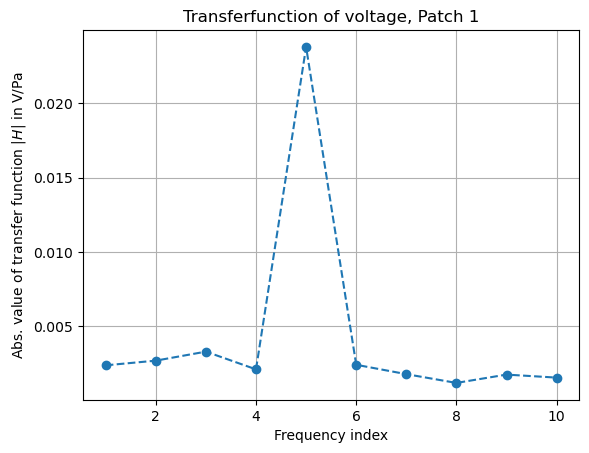

In [1]:
#Compute FRF
import numpy as np; from numpy import sqrt; import matplotlib.pyplot as pl
X = 1e3 # 1000 N/m² = 1000 Pa
Sxy = ( X * np.array([-5.62878, -7.220, 10.8507, -4.41535, -566.17987, 5.80272, 3.164597, 1.4123,-3.0571, -2.38866 ] ) / 
            sqrt( np.array([5.62878, 7.220, 10.8507, 4.41535, 566.17987, 5.80272, 3.164597, 1.4123, 3.0571, 2.38866 ] ) )# Amplitude = Y x Y*
       )
Sxx = np.ones(len(Sxy)) * X * X 

H = Sxy / Sxx 
Habs = abs(H)
print("H = ", H, "\n|H| = ", Habs)
pl.plot(np.arange(len(Habs)) +1, Habs, "--o"); pl.grid()
pl.xlabel("Frequency index"); pl.ylabel("Abs. value of transfer function $|H|$ in V/Pa"); pl.title("Transferfunction of voltage, Patch 1")

**Patch 2** [file here/](history/harmonic1-elecPotential-node-21872-Patch2_SupNodes.hist)
|f (Hz) | ampl (V) | phase (deg) | FRF $H$ [ in V / Pa ] |
|--|:--:| :--:| :--:|
1 | 12.4410 | 180 | dd
56.4444 | 19.468 | 180 |
111.889  |178.797  |0
167.333 | 17.454  |180
222.778 | 685.287 |180
278.222 | 3.235  |0
333.667 | 0.626  |0
389.111 | 10.0133  |0
444.556 | 2.263  |180
500 | 19.379 | 180

Text(0.5, 1.0, 'Transferfunction of voltage, Patch 2')

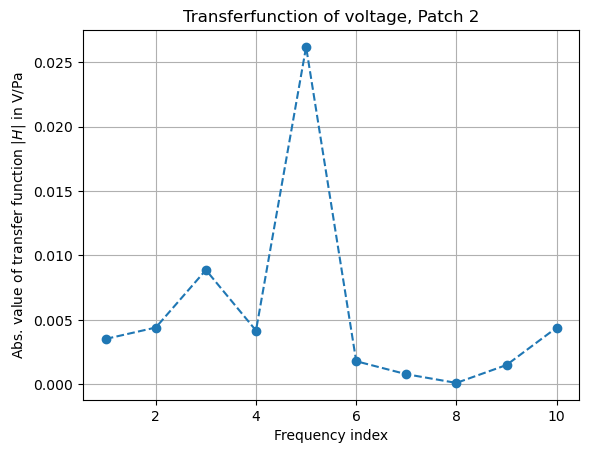

In [43]:
X = 1e3 # 1000 N/m² = 1000 Pa
Sxy = ( X * np.array([-12.441, -19.4681, 78.797, 17.4540, 685.2873, -3.23548, -0.62565, 0.013286,-2.2628, -19.378706 ] ) / 
            sqrt( abs(np.array([-12.441, -19.4681, 78.797, 17.4540, 685.2873, -3.23548, -0.62565, 0.013286,-2.2628, -19.378706 ]) ) )# Amplitude = Y x Y*
       )
Sxx = np.ones(len(Sxy)) * X * X 

H = Sxy / Sxx 
Habs = abs(H)
pl.plot(np.arange(len(Habs)) +1, Habs, "--o"); pl.grid()
pl.xlabel("Frequency index"); pl.ylabel("Abs. value of transfer function $|H|$ in V/Pa"); pl.title("Transferfunction of voltage, Patch 2")

**Patch 3** [file here/](history/harmonic1-elecPotential-node-22025-Patch3_SupNodes.hist)
|f (Hz) | ampl (V) | phase (deg) | FRF $H$ [ in V / Pa ] |
|--|:--:| :--:| :--:|
1 | 2.5043 | 180 | -0.00158
56.4444 | 2.61868 | 180 | -0.001618
111.889  |3.1206  |180 |-0.001767
167.333 | 4.51767  |180 |-0.002125
222.778 | 295.33585 |180 | -0.0172
278.222 | 1.0829  |0 | 0.001041
333.667 | 1.1545  |180 | -0.0011
389.111 | 2.8561  |180 | -0.00169
444.556 | 7.9667  |180 | -0.0028
500 | 12.7523 | 0 | 0.0036

Text(0.5, 1.0, 'Transferfunction of voltage, Patch 3')

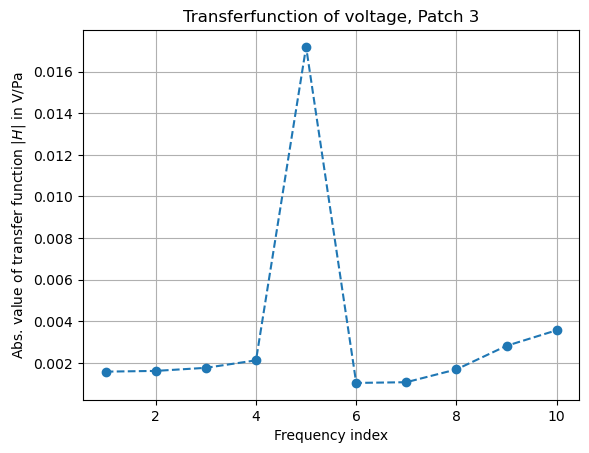

In [42]:
X = 1e3 # 1000 N/m² = 1000 Pa
Sxy = ( X * np.array([-2.50432, -2.61868, -3.12063, -4.51767, -295.33585, 1.0829, -1.15453, -2.856158,-7.96674, 12.75225 ] ) / 
            sqrt( abs(np.array([ -2.50432, -2.61868, -3.12063, -4.51767, -295.33585, 1.0829, -1.15453, -2.856158,-7.96674, 12.75225 ]) ) )# Amplitude = Y x Y*
       )
Sxx = np.ones(len(Sxy)) * X * X 

H = Sxy / Sxx 
Habs = abs(H)
pl.plot(np.arange(len(Habs)) +1, Habs, "--o"); pl.grid()
pl.xlabel("Frequency index"); pl.ylabel("Abs. value of transfer function $|H|$ in V/Pa"); pl.title("Transferfunction of voltage, Patch 3")

The transferfunction of the displacement of the node has the units of meters / Pascal = $m/Pa$ <br><br>
**Central node** [file here/](history/harmonic1-mechDisplacement-node-230-P_middle.hist)


,f (Hz),Amplitude,Phase (deg),FRF $H$ [ in V / Pa ]
0,1.0000,0.000399,180.0,-0.000020
1,56.4444,0.000592,180.0,-0.000024
2,111.8890,0.002023,0.0,0.000045
3,167.3330,0.000325,180.0,-0.000018
4,222.7780,0.006468,180.0,-0.000080
5,278.2220,0.000011,0.0,0.000003
6,333.6670,0.000021,0.0,0.000005
7,389.1110,0.000019,0.0,0.000004
8,444.5560,0.000006,180.0,-0.000003
9,500.0000,0.000075,180.0,-0.000009


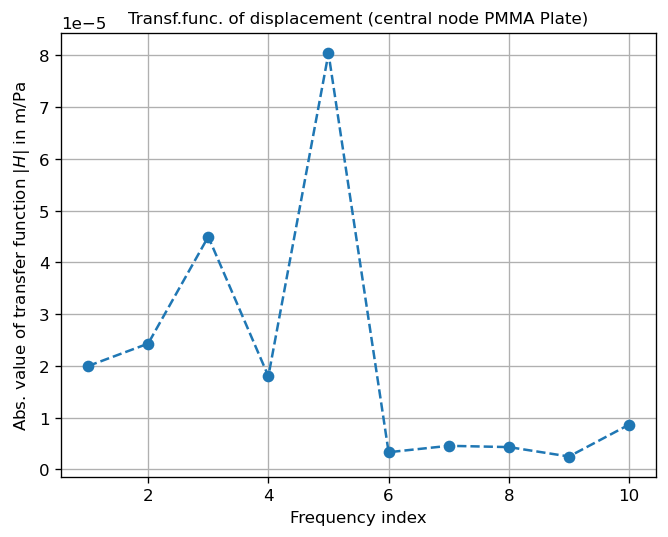

In [13]:
import pandas as pd

file_path = 'history/harmonic1-mechDisplacement-node-230-P_middle.hist'
data = np.loadtxt(file_path, skiprows=3)  # Load data from the text file

# Extract relevant columns
f = data[:,0]
x_ampl = data[:, 1]
x_phase = data[:, 2]

# Set fac[i] to -1 where x_phase[i] is equal to 180
fac = np.ones(len(x_phase)); fac[x_phase == 180] = -1
y_ampl = data[:, 3]
z_ampl = data[:, 5]
amplitude = np.sqrt( x_ampl**2  + y_ampl**2 + z_ampl**2 )# Compute the amplitude

X = 1e3 # 1000 N/m² = 1000 Pa
Sxy =  X * fac * amplitude/sqrt(amplitude)  # Amplitude = Y x Y*
Sxx = np.ones(len(Sxy)) * X * X 

H = Sxy / Sxx 
Habs = abs(H)

pl.figure(dpi=120);pl.plot(np.arange(len(Habs)) +1, Habs, "--o"); pl.grid()
pl.xlabel("Frequency index"); pl.ylabel("Abs. value of transfer function $|H|$ in m/Pa")
pl.title("Transf.func. of displacement (central node PMMA Plate)", fontsize=10)

df = pd.DataFrame({
    'f (Hz)': f,
    'Amplitude': amplitude,
    'Phase (deg)': x_phase,
    'FRF $H$ [ in V / Pa ]': H,
})
display(df)

We can observe a peak in the plots always at the 5th frequency $f_5 = 222.778 Hz$. This is due to the fact, that it is very close to the 3rd **eigenfrequency** that is $223.335 Hz$. At resonance frequencies, one can observe an especially strong "response": the peaks in the resulting FRF function are resonant frequencies of the test object.

* Instead of harmonic pressure, apply a harmonic voltage of 500V on patch 3 and compute the transfer function (up to 500Hz) for the voltage at patches 1 and 2. Plot the transfer functions and briefly discuss what you observe. **(1.5 points)**

This version of harmonic analysis is in the [simulation_harmonic2.xml]()  file.

In this case, the transfer function is dimensionsless ("Volt" is standing both in nominator and denominator)

**Patch 1** [File here](history/harmonic2-elecPotential-node-21681-Patch1_SupNodes.hist)

,f (Hz),Amplitude (V),Phase (deg),H (dimesionsless)
0,1.0000,0.031232,0.0,0.000177
1,56.4444,0.036006,0.0,0.000190
2,111.8890,0.115929,0.0,0.000340
3,167.3330,0.815416,180.0,-0.000903
4,222.7780,90.101619,180.0,-0.009492
5,278.2220,2.252366,0.0,0.001501
6,333.6670,22.035683,180.0,-0.004694
7,389.1110,2.473561,180.0,-0.001573
8,444.5560,4.348608,180.0,-0.002085
9,500.0000,2.574883,180.0,-0.001605


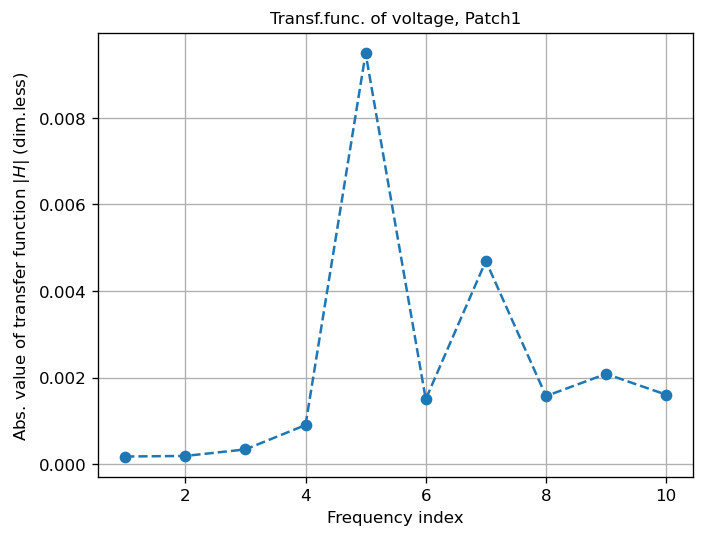

In [48]:
file_path = 'history/harmonic2-elecPotential-node-21681-Patch1_SupNodes.hist'
data = np.loadtxt(file_path, skiprows=3)  # Load data from the text file

f = data[:,0] # Extract relevant columns
Vampl = data[:, 1]
phase = data[:, 2]

# Set fac[i] to -1 where x_phase[i] is equal to 180
fac = np.ones(len(phase)); fac[phase == 180] = -1
X = 1e3 # 1000 N/m² = 1000 Pa

Sxy =  X * fac * Vampl/sqrt(Vampl)  # Amplitude = Y x Y*
Sxx = np.ones(len(Sxy)) * X * X 

H = Sxy / Sxx 
Habs = abs(H)

pl.figure(dpi=120);pl.plot(np.arange(len(Habs)) +1, Habs, "--o"); pl.grid()
pl.xlabel("Frequency index"); pl.ylabel("Abs. value of transfer function $|H|$ (dim.less)")
pl.title("Transf.func. of voltage, Patch1", fontsize=10)

df = pd.DataFrame({
    'f (Hz)': f,
    'Amplitude (V)': Vampl,
    'Phase (deg)': phase,
    'H (dimesionsless)': H,
})
display(df)

**Patch 2** [File here](history/harmonic2-elecPotential-node-21971-Patch2_SupNodes.hist)

,f (Hz),Amplitude (V),Phase (deg),H (dimesionsless)
0,1.0000,0.193635,0.0,0.000440
1,56.4444,0.220236,0.0,0.000469
2,111.8890,0.327155,0.0,0.000572
3,167.3330,0.752787,0.0,0.000868
4,222.7780,108.446806,0.0,0.010414
5,278.2220,1.474181,180.0,-0.001214
6,333.6670,0.771071,180.0,-0.000878
7,389.1110,1.510164,180.0,-0.001229
8,444.5560,4.003184,180.0,-0.002001
9,500.0000,3.750291,180.0,-0.001937


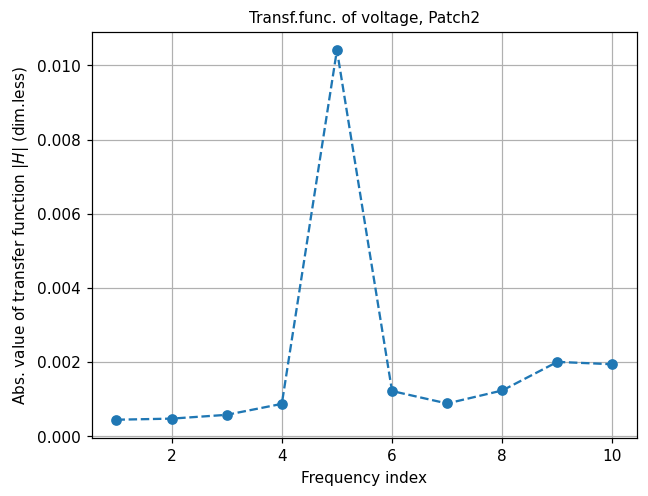

In [23]:
file_path = 'history/harmonic2-elecPotential-node-21971-Patch2_SupNodes.hist'
data = np.loadtxt(file_path, skiprows=3)  # Load data from the text file

f = data[:,0] # Extract relevant columns
Vampl = data[:, 1]
phase = data[:, 2]

# Set fac[i] to -1 where x_phase[i] is equal to 180
fac = np.ones(len(phase)); fac[phase == 180] = -1
X = 1e3 # 1000 N/m² = 1000 Pa

Sxy =  X * fac * Vampl/sqrt(Vampl)  # Amplitude = Y x Y*
Sxx = np.ones(len(Sxy)) * X * X 

H = Sxy / Sxx 
Habs = abs(H)

pl.figure(dpi=110);pl.plot(np.arange(len(Habs)) +1, Habs, "--o"); pl.grid()
pl.xlabel("Frequency index"); pl.ylabel("Abs. value of transfer function $|H|$ (dim.less)")
pl.title("Transf.func. of voltage, Patch2", fontsize=10)

df = pd.DataFrame({
    'f (Hz)': f,
    'Amplitude (V)': Vampl,
    'Phase (deg)': phase,
    'H (dimesionsless)': H,
})
display(df)

Herewe also observe the resonant behaviour (peak) at $f_5 \approx$ 3rd eigenfrequency. For the first patch, we observe a second smaller peak at $f_7 = 389.11Hz$. That is close to the seventh eigenfrequency $366.416 Hz$

## 7. Transient analysis

_Calculate the rayleigh damping coefficients $\alpha$ and $\beta$ for a damping ratio $\zeta$ of 0.01 at the eigenmodes $1$ and $3$ (up to 500 Hz) and use them as damping inputs in the material definition (Refer [Mechanic PDE in the CFS user documentation](https://opencfs.gitlab.io/userdocu/PDEExplanations/Singlefield/MechanicPDE/))_ **(1 point)**

The _Rayleigh_ damping parameters $\alpha$ and $\beta$ are defined from the following equations (we consider the resonant frequencies 1 and 3):

$$
\alpha + \beta (\omega_{1} + \Delta \omega)^{2}=2 (\omega_{1} + \Delta\omega) \zeta_{1} \, ,
$$

$$
\alpha + \beta ( \omega_{3} - \Delta \omega)^{3}=2 ( \omega_{3} - \Delta\omega) \zeta_{3} \, . 
$$

$\Delta\omega  = \omega_{1} - \omega_{3}$. Using, that $\omega_i = 2\pi f_i$ ($f_i$ being the resoant frequency$) on obtains:

$$
\alpha =\frac{2 \omega_ 1 \omega_ 3 (\zeta_1 \omega_3- \zeta_3 \omega_1)}{\omega_3 ²-\omega_1 ²} = 4 \pi f_1 f_3 \frac{\zeta_1 f_3 -\zeta_3 f_1}{f_3 ² - f_1 ²} \\ .\\ .\\

\beta = 2 \frac{\omega_3 \zeta_3 - \omega_1 \zeta_1}{\omega_3^2 - \omega_1^2} = \frac{f_3 \zeta_3 - f_1 \zeta_1}{\pi (f_3^2 - f_1^2)}
$$

This results in

$$
\alpha = 8.7610 \\
\beta = 9.80338 \times 10^{-6}
$$

In [20]:
pi = np.pi
zeta = 0.01 #damping
omega1 = 2*pi*101.359; f1 = 101.359
omega3 = 2*pi*223.335; f3 = 223.335

alpha = 4*pi*f1*f3* (zeta * f3 -zeta * f1)/(f3**2 - f1**2); print("Alpha = ", alpha)
beta = ( f3 * zeta - f1 *zeta )/( pi * (f3**2 - f1**2) ); print("Beta = ", beta)

Alpha =  8.761020706381522
Beta =  9.803380604008412e-06


_Set up a transient analysis of the plate from a preloaded configuration and simulate by releasing the load under rayleigh damping for 0.5 seconds with at least 1000 time steps. (Hint: Use the results from the static analysis as the preloaded configuration)_ **(1.5 points)** <br><br>
_Observe the damped response by plotting the displacement of the central node and the voltage at patch 1. Briefly discuss the frequency components present in the response and why? (Hint: FFT)_  **(1.5 points)**

I simulated over $N=1100$ timesteps, with $\Delta t = 0.5 / N$. The steup can be seen in the file [simulation_transient.xml](simulation_transient.xml).
<br><br>
First, consider the displacement of the central node. The data is from the [history file](history/transient-mechDisplacement-node-230-P_middle.hist) saved when runing the cfs simulation. 

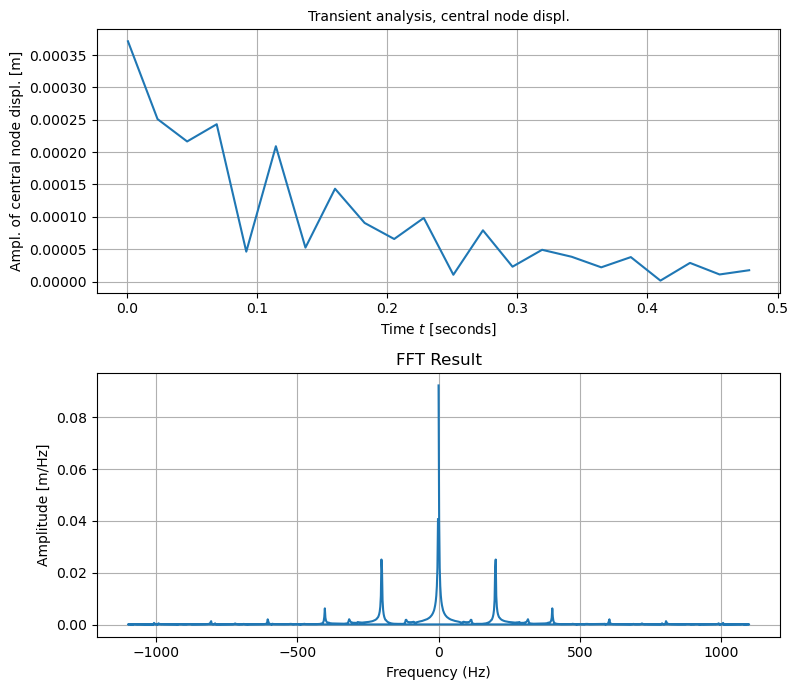

In [38]:
file_path = 'history/transient-mechDisplacement-node-230-P_middle.hist'
data = np.loadtxt(file_path, skiprows=4)  # Load data from the text file

t = data[:,0] # Extract relevant columns
xdispl = data[:, 1]; ydispl = data[:, 2]; zdispl = data[:, 3]
ampl = np.sqrt(xdispl**2 + ydispl**2 + zdispl**2) #amplitudefs = 1100 / 0.5  # Sampling frequency (Hz) = 1/deltaT
signal = ampl

# Perform FFT
fft_result = np.fft.fft(signal)
frequencies = np.fft.fftfreq(len(fft_result), 1/fs)

# Plot the original signal and its FFT
pl.figure(figsize=(8, 7))

pl.subplot(2, 1, 1)
pl.plot(t[::50], signal[::50]); pl.grid()
pl.xlabel("Time $t$ [seconds]"); pl.ylabel("Ampl. of central node displ. [m]")
pl.title("Transient analysis, central node displ.", fontsize=10)

pl.subplot(2, 1, 2)
pl.plot(frequencies, np.abs(fft_result)); pl.grid()
pl.title('FFT Result')
pl.xlabel('Frequency (Hz)')
pl.ylabel('Amplitude [m/Hz]')

pl.tight_layout()
pl.show()

We can also see the peaks at our eigenfrequencies that we computed in eigenfrequency analysis (both in positive and negative frequency diretion, that is a property of FFT) <br><br>

Now look at the voltage at patch 1. The data is from the [history file](history/transient-elecPotential-node-21835-Patch1_SupNodes.hist) saved when runing the cfs simulation. 

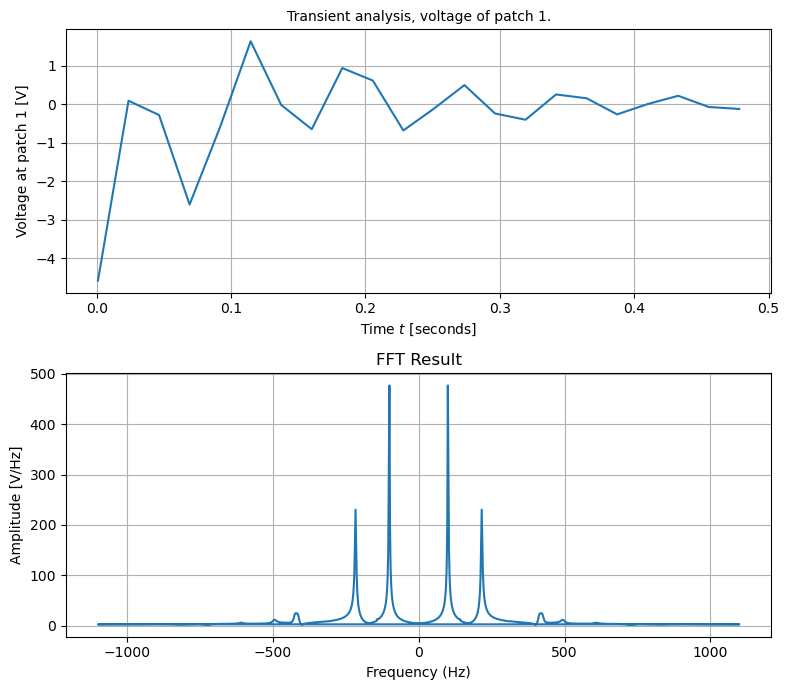

In [39]:
file_path = 'history/transient-elecPotential-node-21835-Patch1_SupNodes.hist'
data = np.loadtxt(file_path, skiprows=4)  # Load data from the text file

t = data[:,0] # Extract relevant columns
voltage = data[:,1]
signal = voltage

# Perform FFT
fft_result = np.fft.fft(signal)
frequencies = np.fft.fftfreq(len(fft_result), 1/fs)

# Plot the original signal and its FFT
pl.figure(figsize=(8, 7))

pl.subplot(2, 1, 1)
pl.plot(t[::50], signal[::50]); pl.grid()
pl.xlabel("Time $t$ [seconds]"); pl.ylabel("Voltage at patch 1 [V]")
pl.title("Transient analysis, voltage of patch 1.", fontsize=10)

pl.subplot(2, 1, 2)
pl.plot(frequencies, np.abs(fft_result)); pl.grid()
pl.title('FFT Result')
pl.xlabel('Frequency (Hz)')
pl.ylabel('Amplitude [V/Hz]')

pl.tight_layout()
pl.show()

Here again, we can observe the peaks at the resonance frequencies that we calculated in eigenvalue analysis. In contradiction to the mechanical analysis, we do not have here peak at $0 Hz$.So we can just discard that frequency if it is not of interest. (hat is what I read in the internet at least). However, performing this operation does not remove the peak apparently.



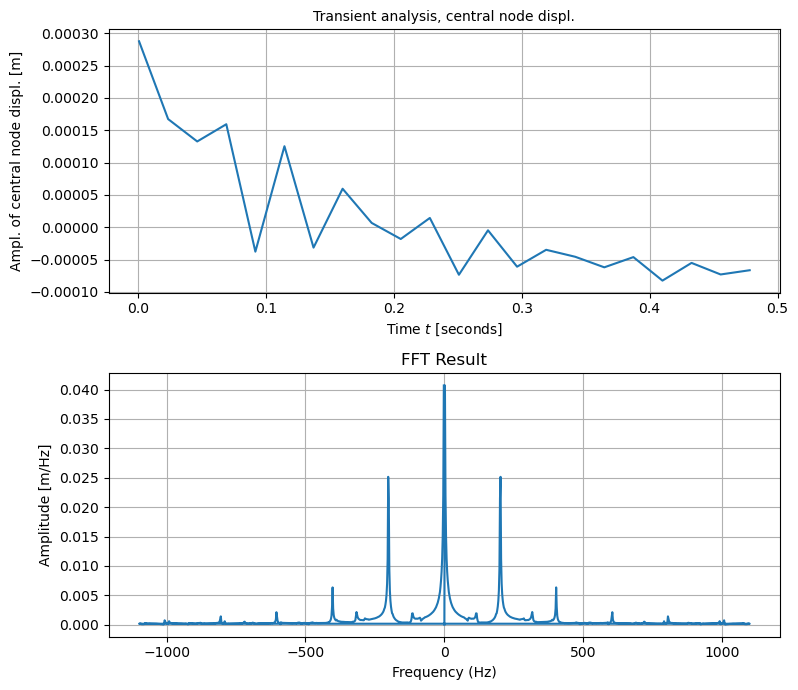

In [41]:
file_path = 'history/transient-mechDisplacement-node-230-P_middle.hist'
data = np.loadtxt(file_path, skiprows=4)  # Load data from the text file

t = data[:,0] # Extract relevant columns
xdispl = data[:, 1]; ydispl = data[:, 2]; zdispl = data[:, 3]
ampl = np.sqrt(xdispl**2 + ydispl**2 + zdispl**2) #amplitudefs = 1100 / 0.5  # Sampling frequency (Hz) = 1/deltaT
signal = ampl - ampl.mean()

# Perform FFT
fft_result = np.fft.fft(signal)
frequencies = np.fft.fftfreq(len(fft_result), 1/fs)

# Plot the original signal and its FFT
pl.figure(figsize=(8, 7))

pl.subplot(2, 1, 1)
pl.plot(t[::50], signal[::50]); pl.grid()
pl.xlabel("Time $t$ [seconds]"); pl.ylabel("Ampl. of central node displ. [m]")
pl.title("Transient analysis, central node displ.", fontsize=10)

pl.subplot(2, 1, 2)
pl.plot(frequencies, np.abs(fft_result)); pl.grid()
pl.title('FFT Result')
pl.xlabel('Frequency (Hz)')
pl.ylabel('Amplitude [m/Hz]')

pl.tight_layout()
pl.show()